In [1]:
import xarray as xr



In [2]:
filepath="/home/eoafrica/eodata/CMEMS/REP/GLO/SST/SST_GLO_SST_L4_REP_OBSERVATIONS_010_011/2022/05/13/20220513120000-UKMO-L4_GHRSST-SSTfnd-OSTIA-GLOB_REP-v02.0-fv02.0.nc"


sstds=xr.open_dataset(filepath)
display(sstds)

<xarray.Dataset>
Dimensions:           (time: 1, lat: 3600, lon: 7200)
Coordinates:
  * time              (time) datetime64[ns] 2022-05-13T12:00:00
  * lat               (lat) float32 -89.97 -89.93 -89.88 ... 89.88 89.93 89.97
  * lon               (lon) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.4, ACDD-1.3
    title:                      Global SST & Sea Ice Analysis, L4 OSTIA, 0.05...
    summary:                    A merged, multi-sensor L4 Foundation SST product
    references:                 Donlon, C.J., Martin, M., Stark, J.D., Robert...
    institution:                UKMO
    history:                    Created from sst.nc; obs_anal.nc; seaice.nc
    ...                         ...
    project:                    Group for High Resolution Sea Surface Tempera...
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid

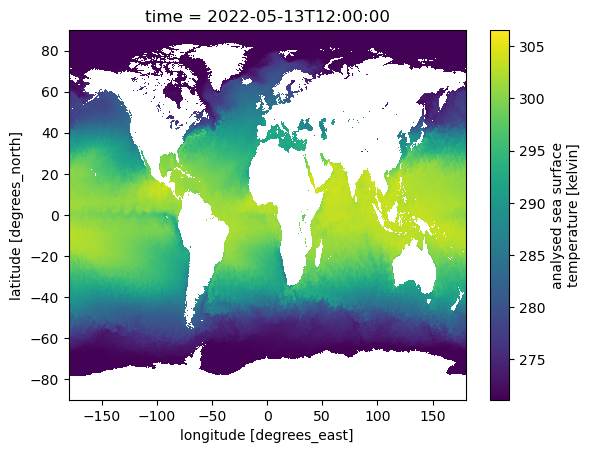

In [16]:
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
# Make a quick plot globally
islice=0
sstds.analysed_sst[islice,:,:].plot()

#fancier version (cmomment above and uncomment below)
# sstds.analysed_sst[islice,:,:].plot(subplot_kws=dict(projection=ccrs.Orthographic(40, -6), facecolor="gray"),transform=ccrs.PlateCarree())



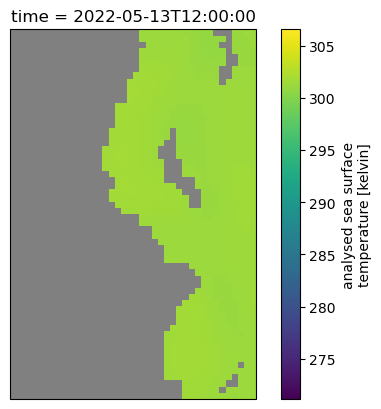

In [18]:
# make a regional plot of the coast off Dar


extent=[38,40,-8,-5]
inputcrs = ccrs.PlateCarree()
sstds.analysed_sst[islice,:,:].plot(subplot_kws=dict(projection=ccrs.Mercator(), facecolor="gray",extent=extent),transform=inputcrs)



